Ziling_Zhang_hw_4

In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import date
from datetime import datetime, timedelta
import os

/Users/cathy/opt/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
today = datetime(2021, 12, 19)

In [3]:
def last_two_complete_days_start(d: datetime) -> datetime:
    start_date_1 = d - timedelta(days=14)
    start_date_2 = d - timedelta(days=7)
    return start_date_1, start_date_2

In [4]:
start_date_1, start_date_2 = last_two_complete_days_start(today)

In [5]:
run_dates = [start_date_1, start_date_2]

In [6]:
connection_string = 'sqlite:///../../../Lectures/Lecture 4/data/data.db'
tokens = pd.read_sql(f'''
SELECT DISTINCT
    token 
FROM ohlc
''', connection_string)["token"].to_list()

In [7]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [8]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=7)}', end='\r')
        res = pm.execute_notebook(
            'Ziling_Zhang_Template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{run_date.year}-{run_date.month}-{run_date.day}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=7)}',
                'token': token,
                'connection_string': connection_string
            }
        )

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

In [9]:
nbs = sb.read_notebooks('outputs')
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'avg_hourly_return':scrap['prices'].data['hourly_return'].mean(),
        'avg_volatility': scrap['prices'].data['hourly_vol_ohlc'].mean(),
        'maximum_drawdown': scrap['prices'].data['hourly_max_drawdown'].max(),
        'range_of_close_price': scrap['prices'].data.close.iloc[-1]-scrap['prices'].data.close.iloc[0]
    }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,avg_hourly_return,avg_volatility,maximum_drawdown,range_of_close_price
0,AAVE,2021-12-12 00:00:00,2021-12-19 00:00:00,-0.000928,0.177171,0.0,-12.2100
1,AAVE,2021-12-05 00:00:00,2021-12-12 00:00:00,-0.000696,0.217887,0.0,-24.5740
2,ADA,2021-12-12 00:00:00,2021-12-19 00:00:00,-0.000935,0.190910,0.0,-0.0939
3,ADA,2021-12-05 00:00:00,2021-12-12 00:00:00,-0.000212,0.212977,0.0,-0.0627
4,ATOM,2021-12-12 00:00:00,2021-12-19 00:00:00,-0.001614,0.218841,0.0,-2.7700
5,ATOM,2021-12-05 00:00:00,2021-12-12 00:00:00,-0.000831,0.284560,0.0,-4.1600
6,AVAX,2021-12-12 00:00:00,2021-12-19 00:00:00,0.000089,0.228866,0.0,0.0100
7,AVAX,2021-12-05 00:00:00,2021-12-12 00:00:00,-0.000357,0.273697,0.0,-7.4200
8,BTC,2021-12-12 00:00:00,2021-12-19 00:00:00,-0.000316,0.127243,0.0,-1188.6600
9,BTC,2021-12-05 00:00:00,2021-12-12 00:00:00,-0.000019,0.142326,0.0,-387.9500


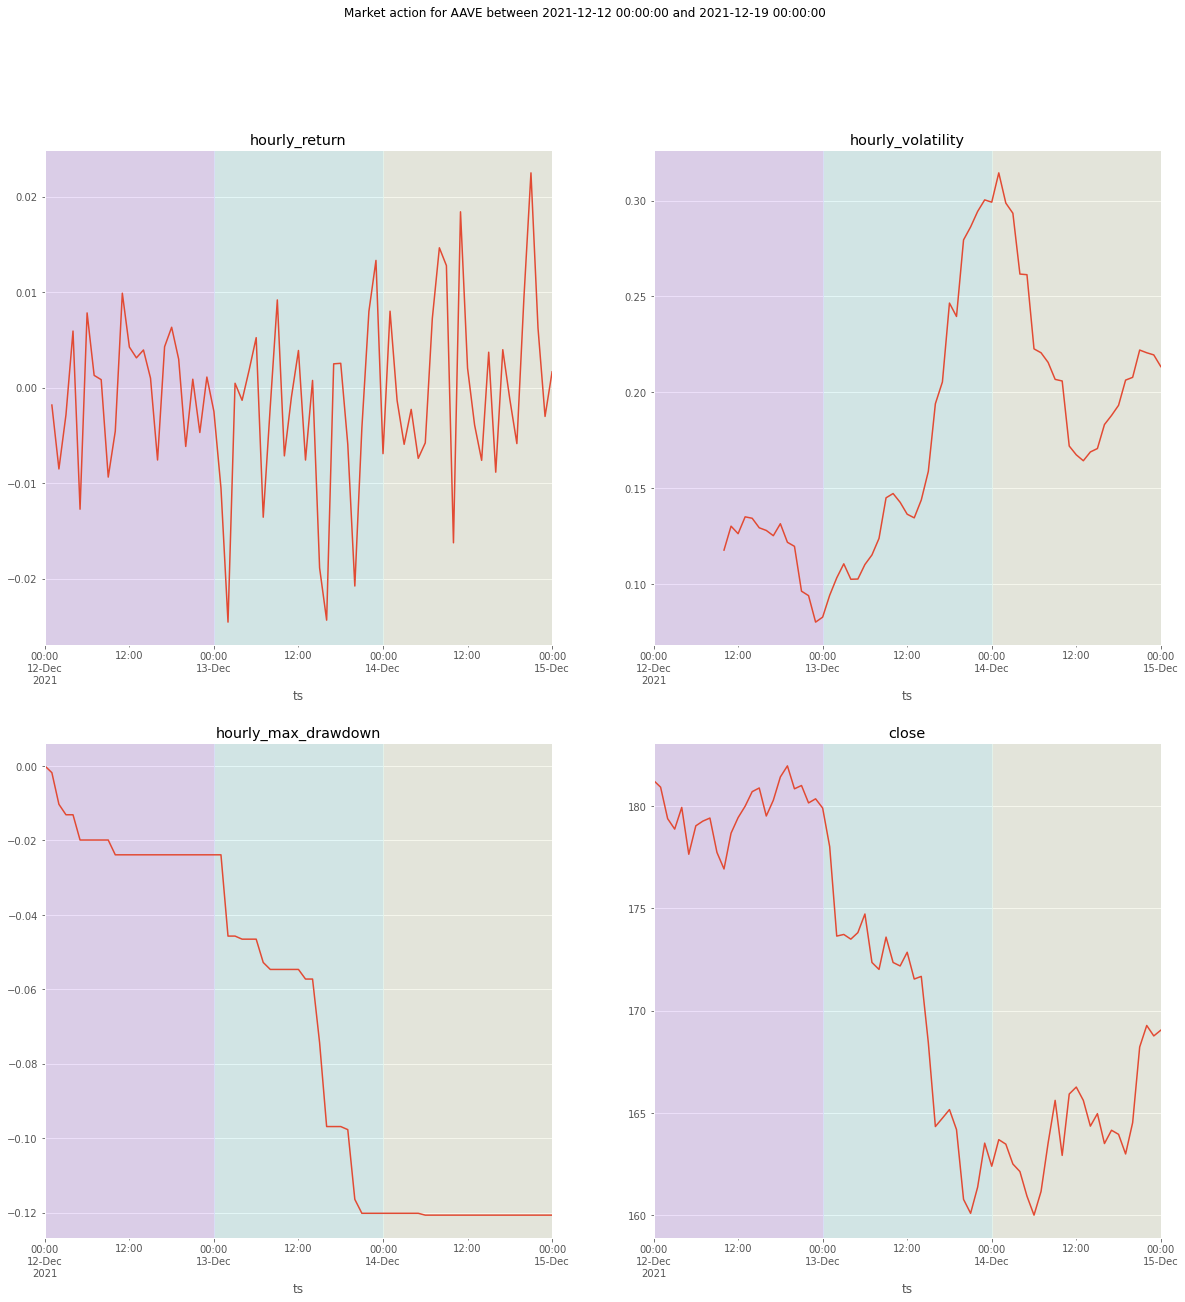

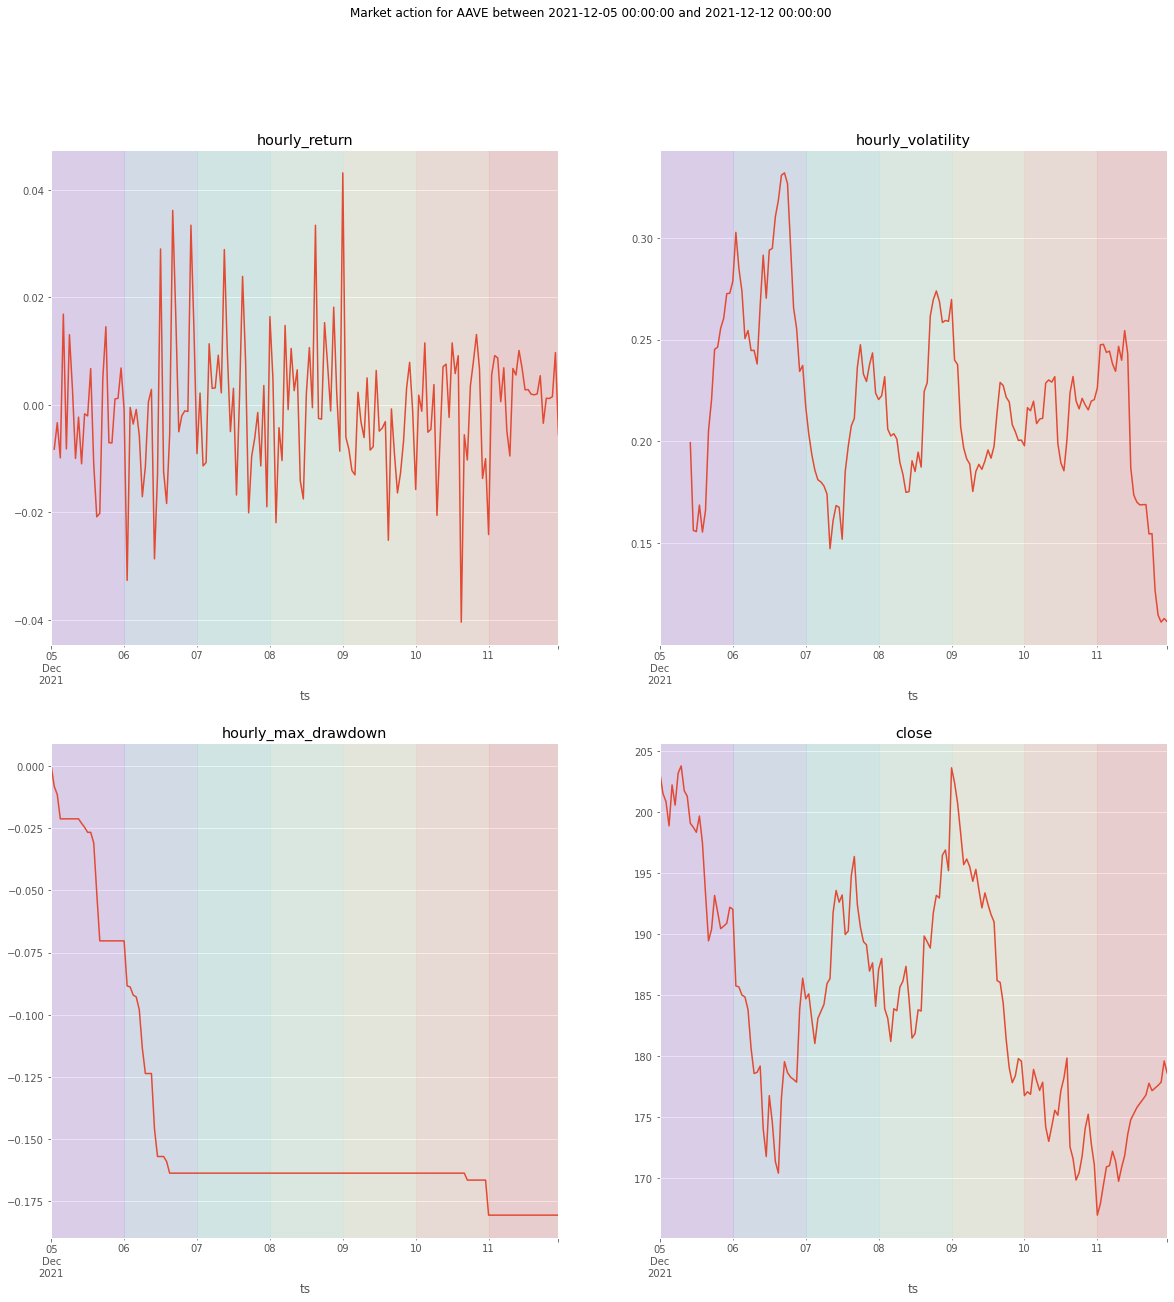

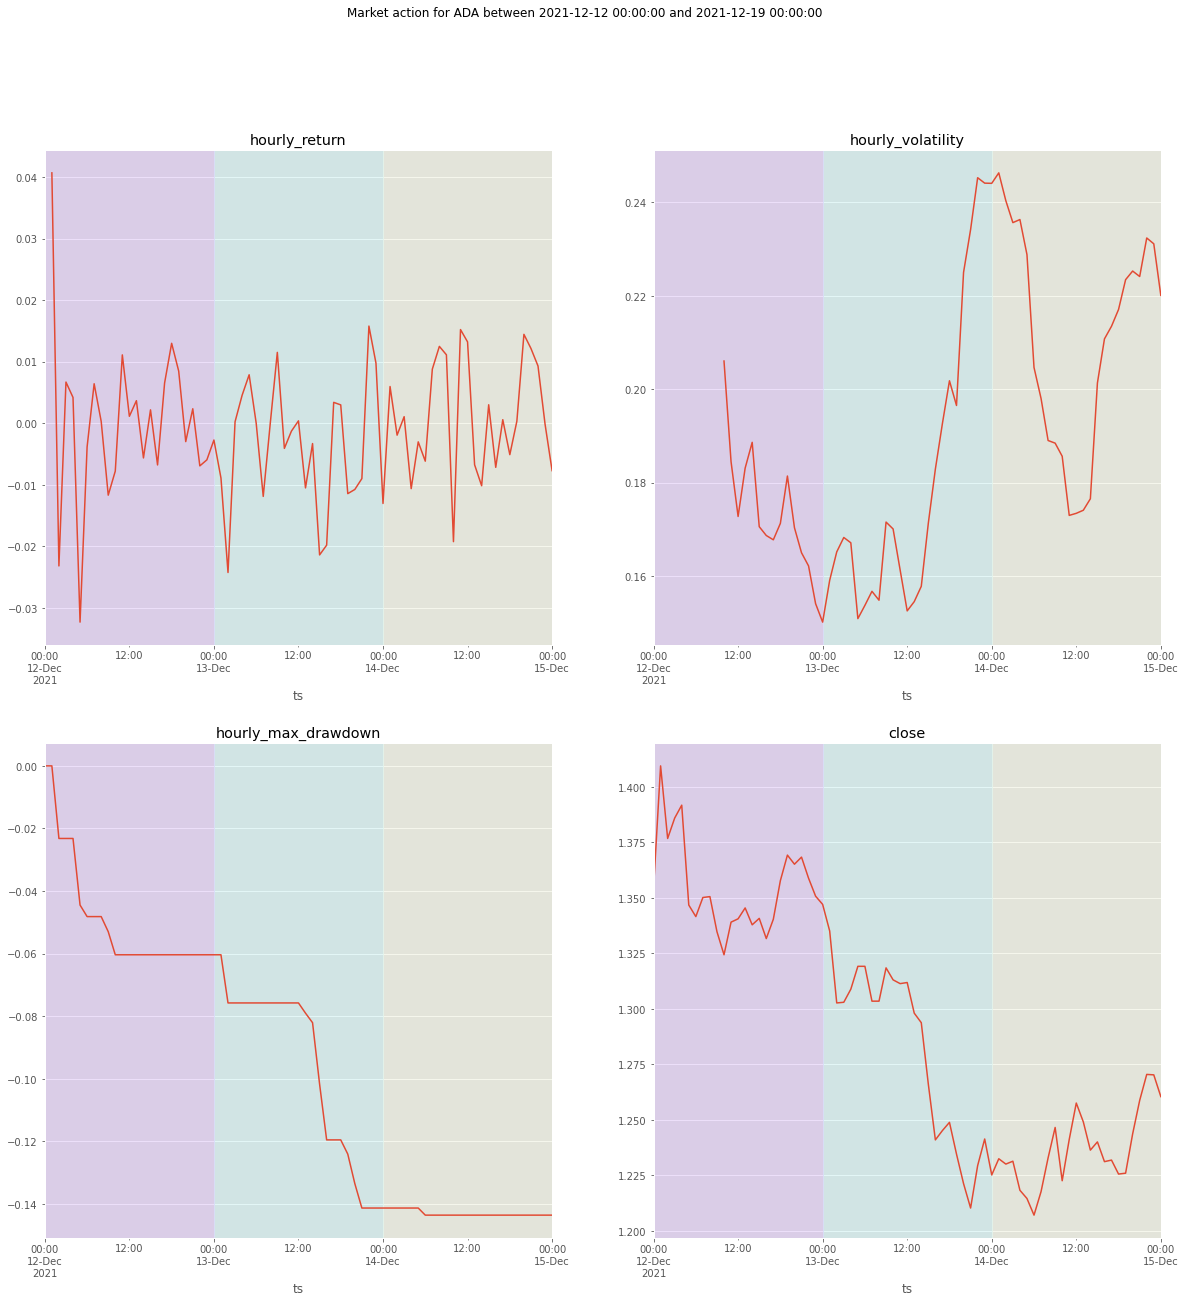

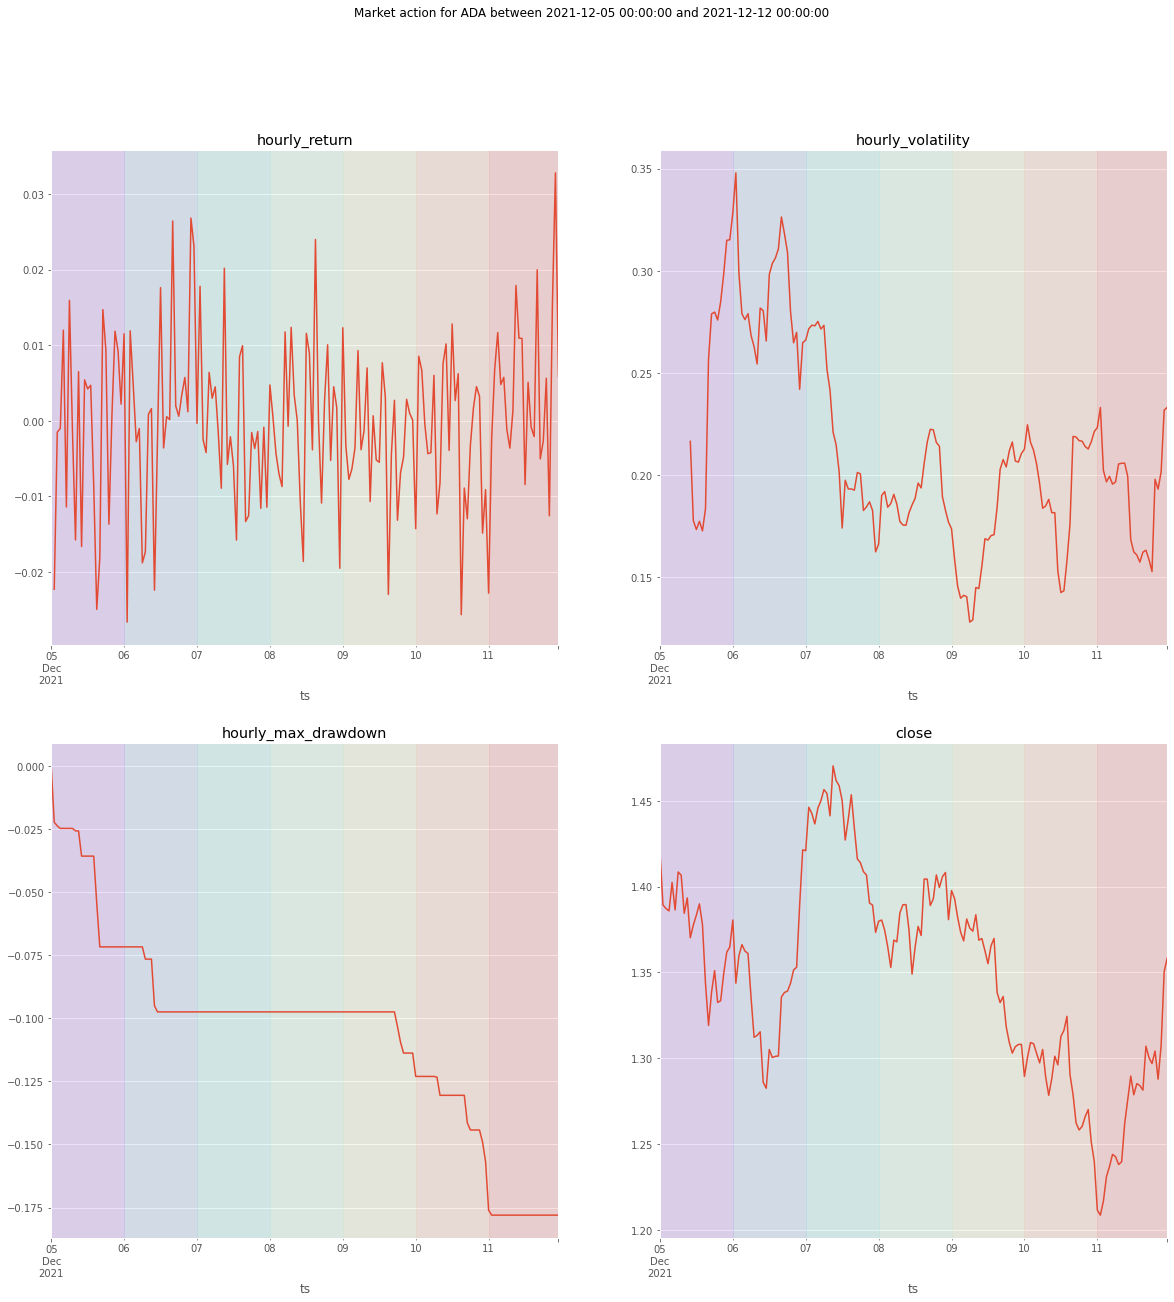

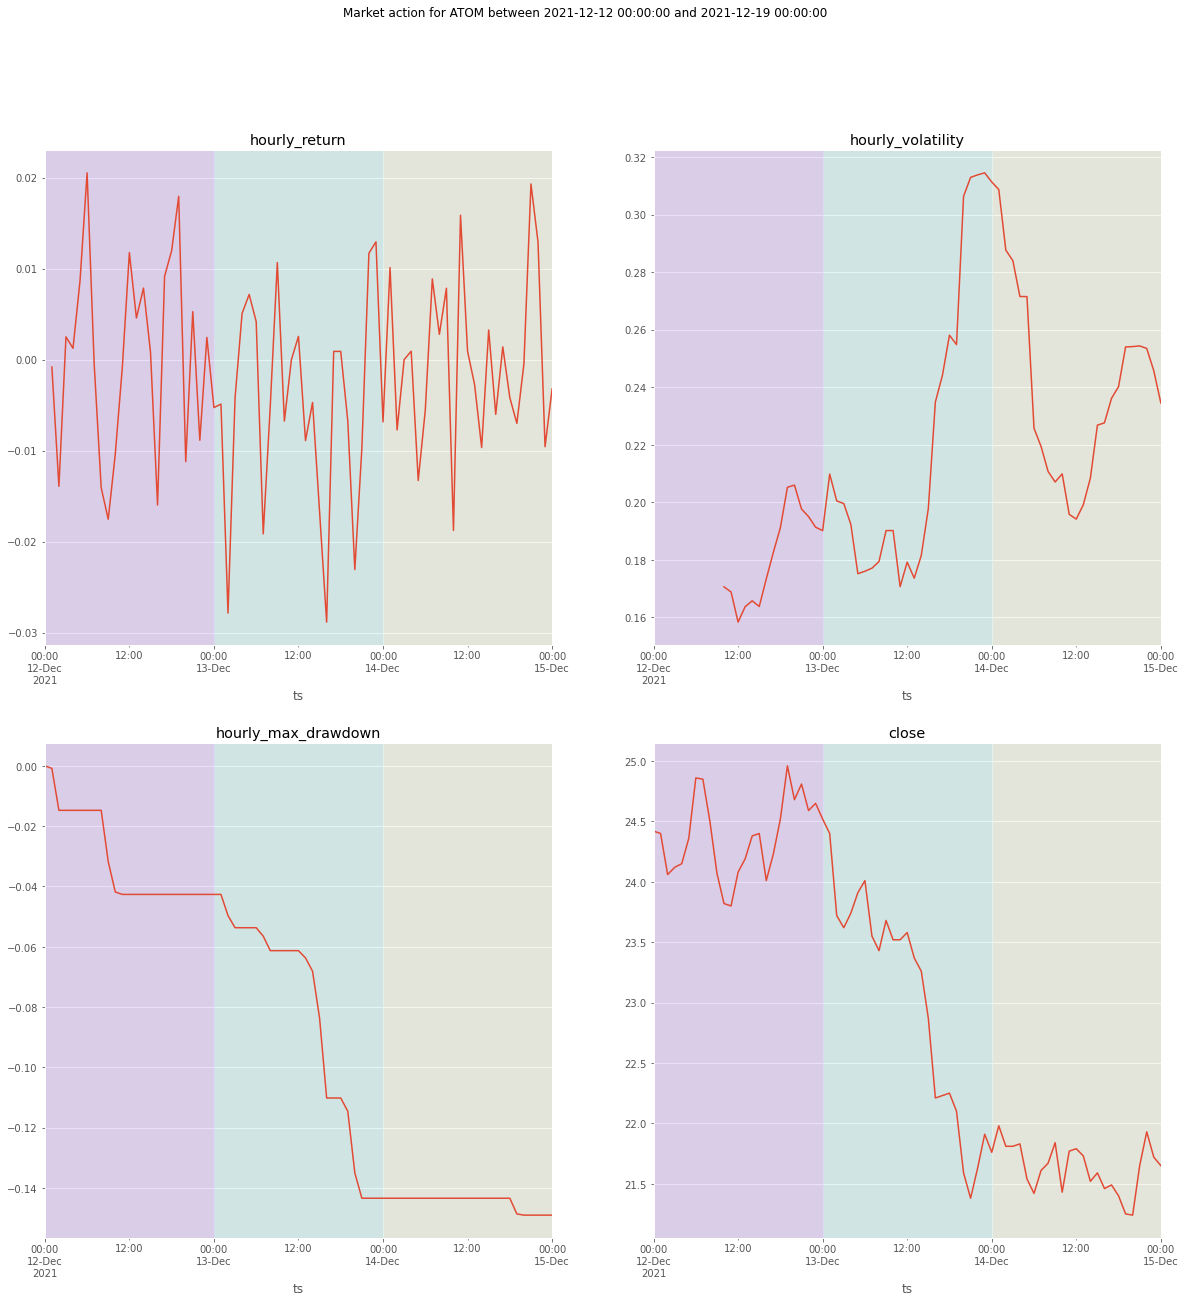

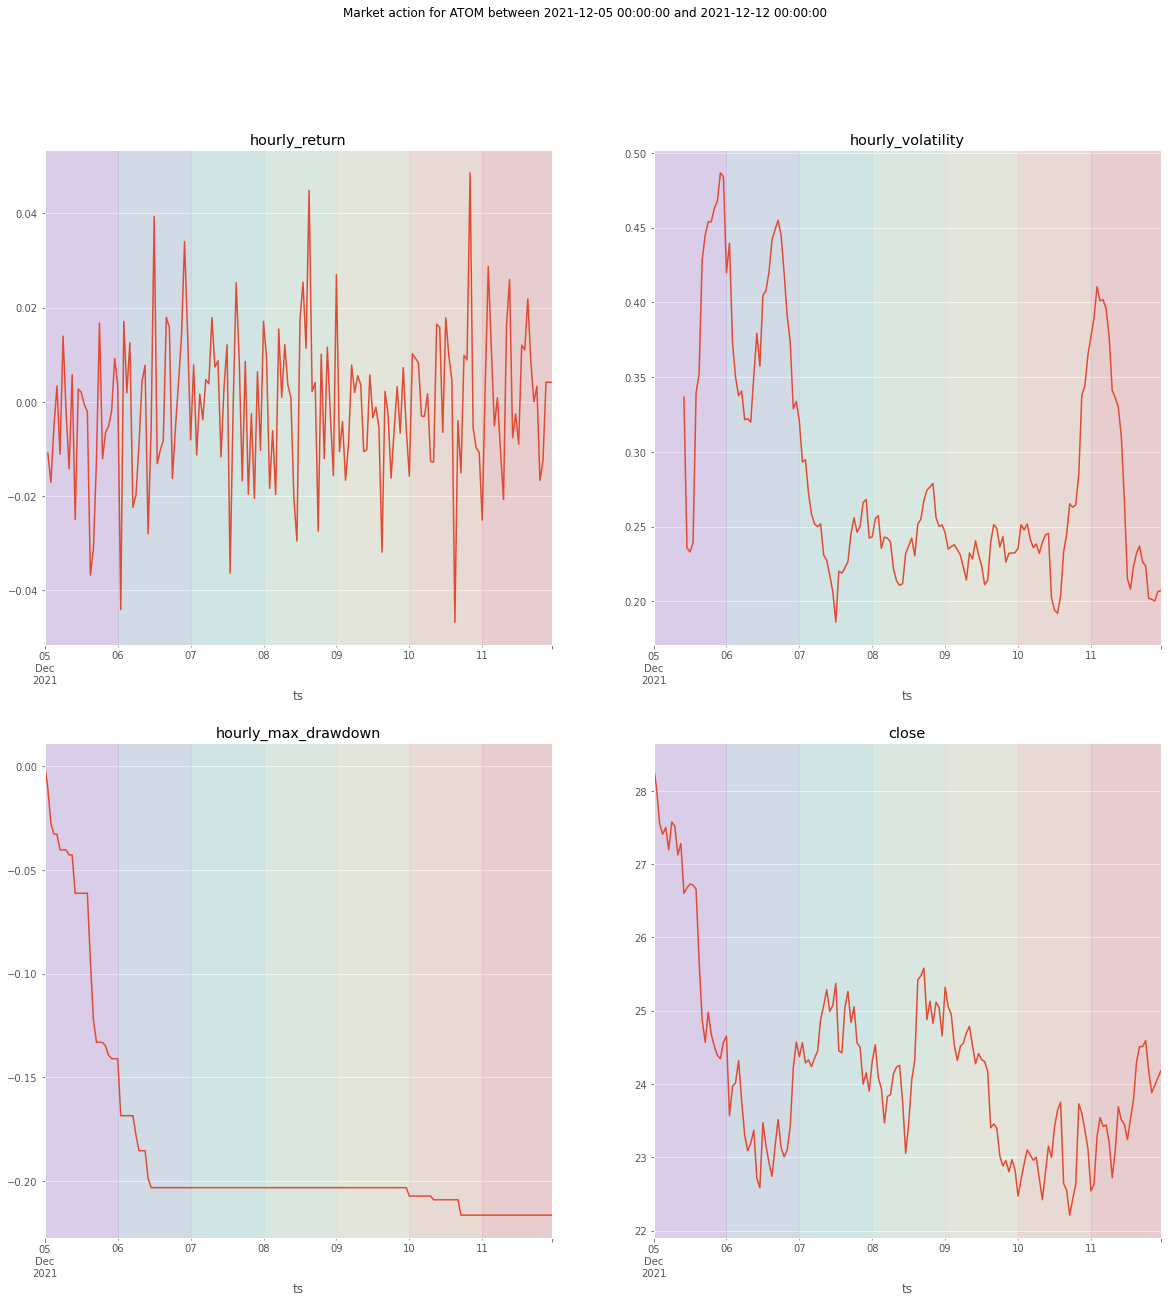

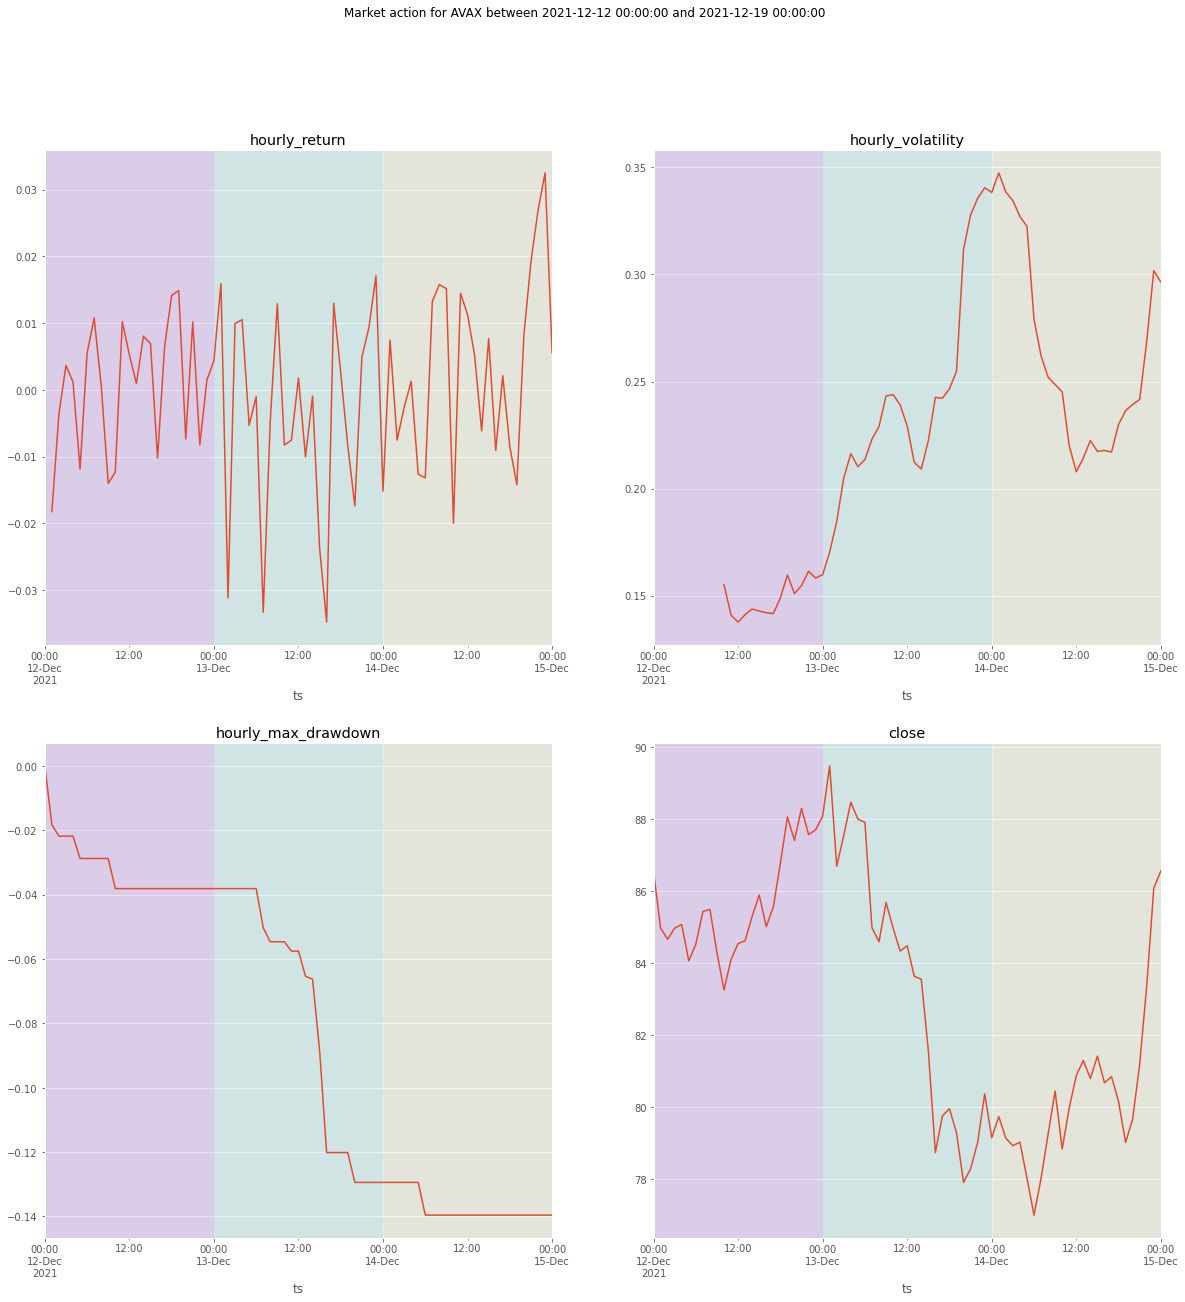

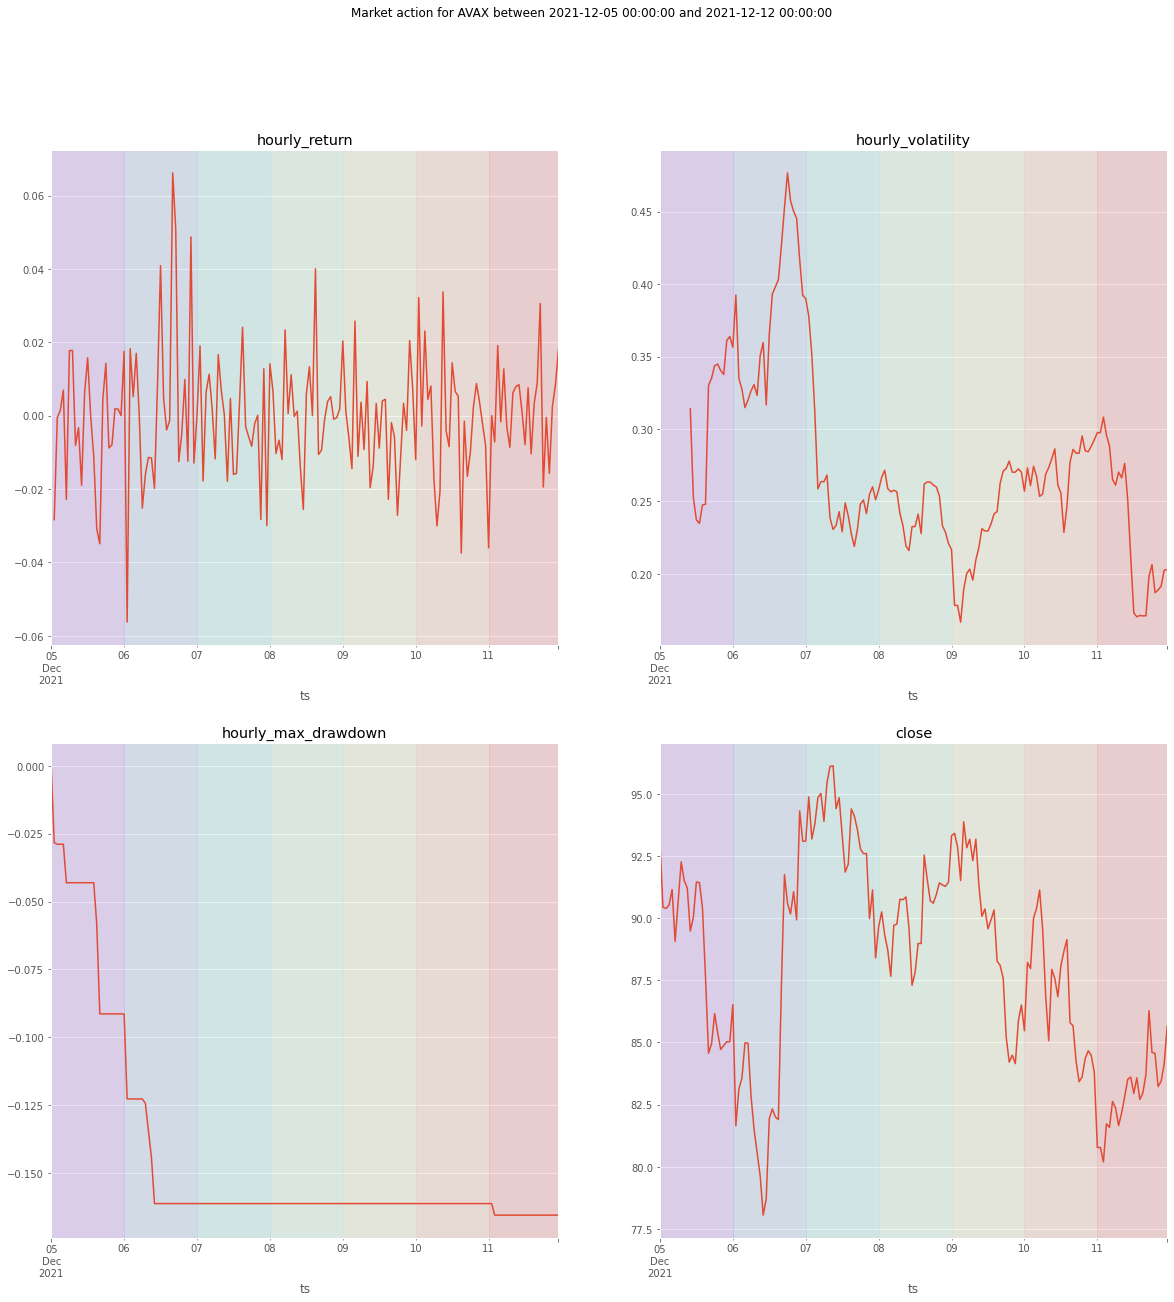

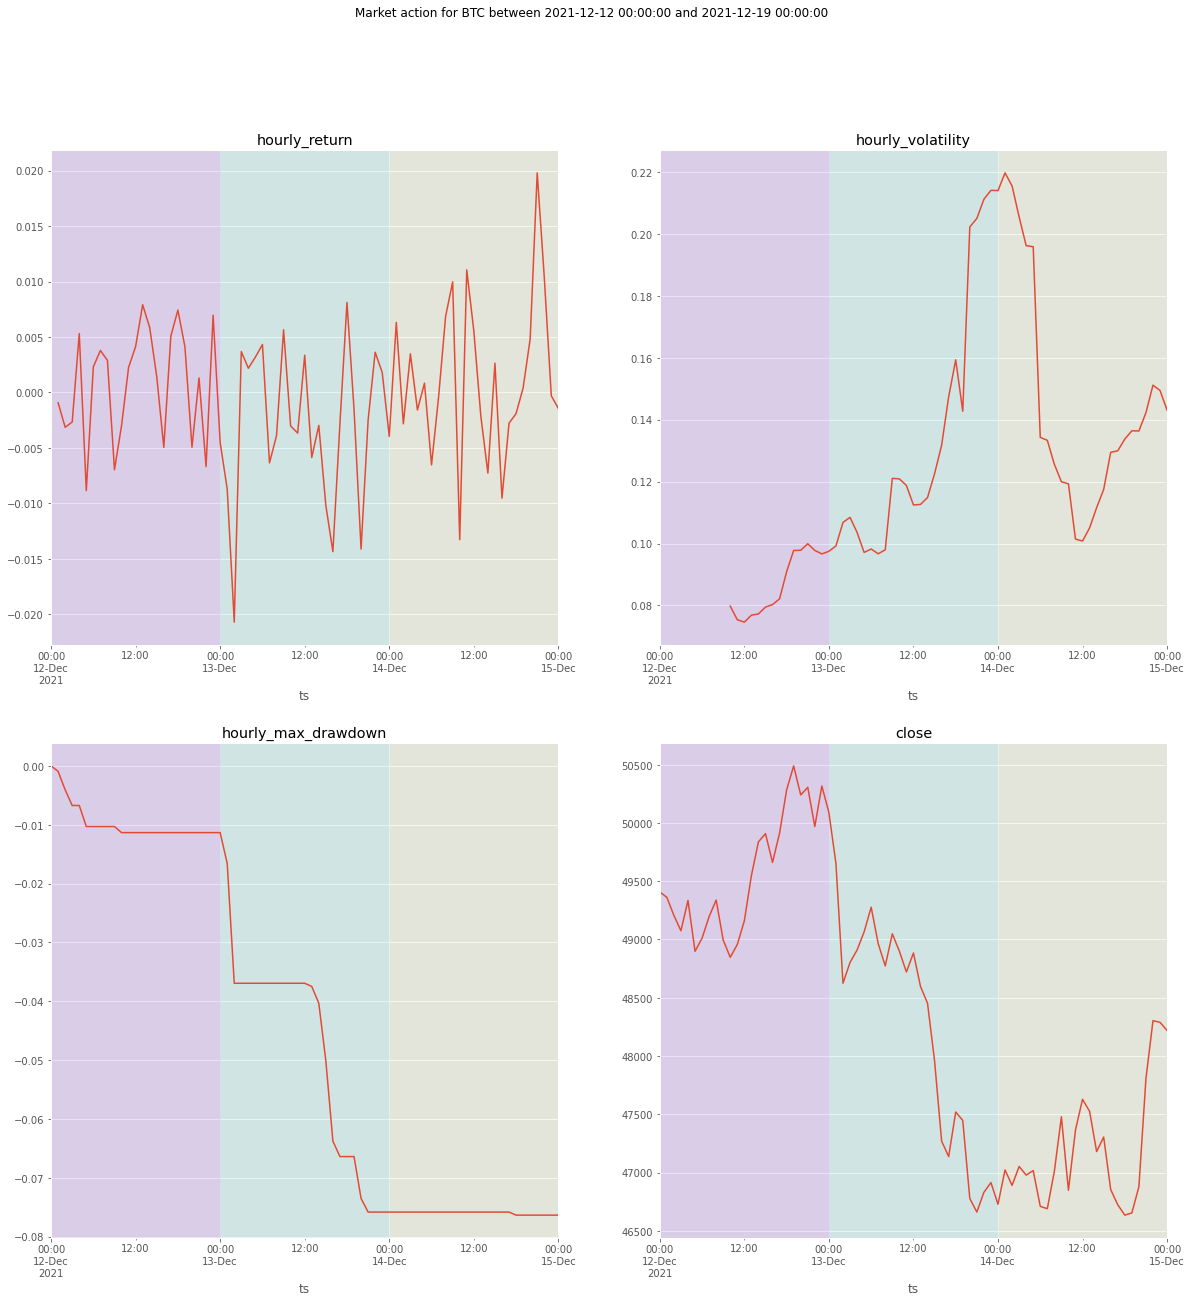

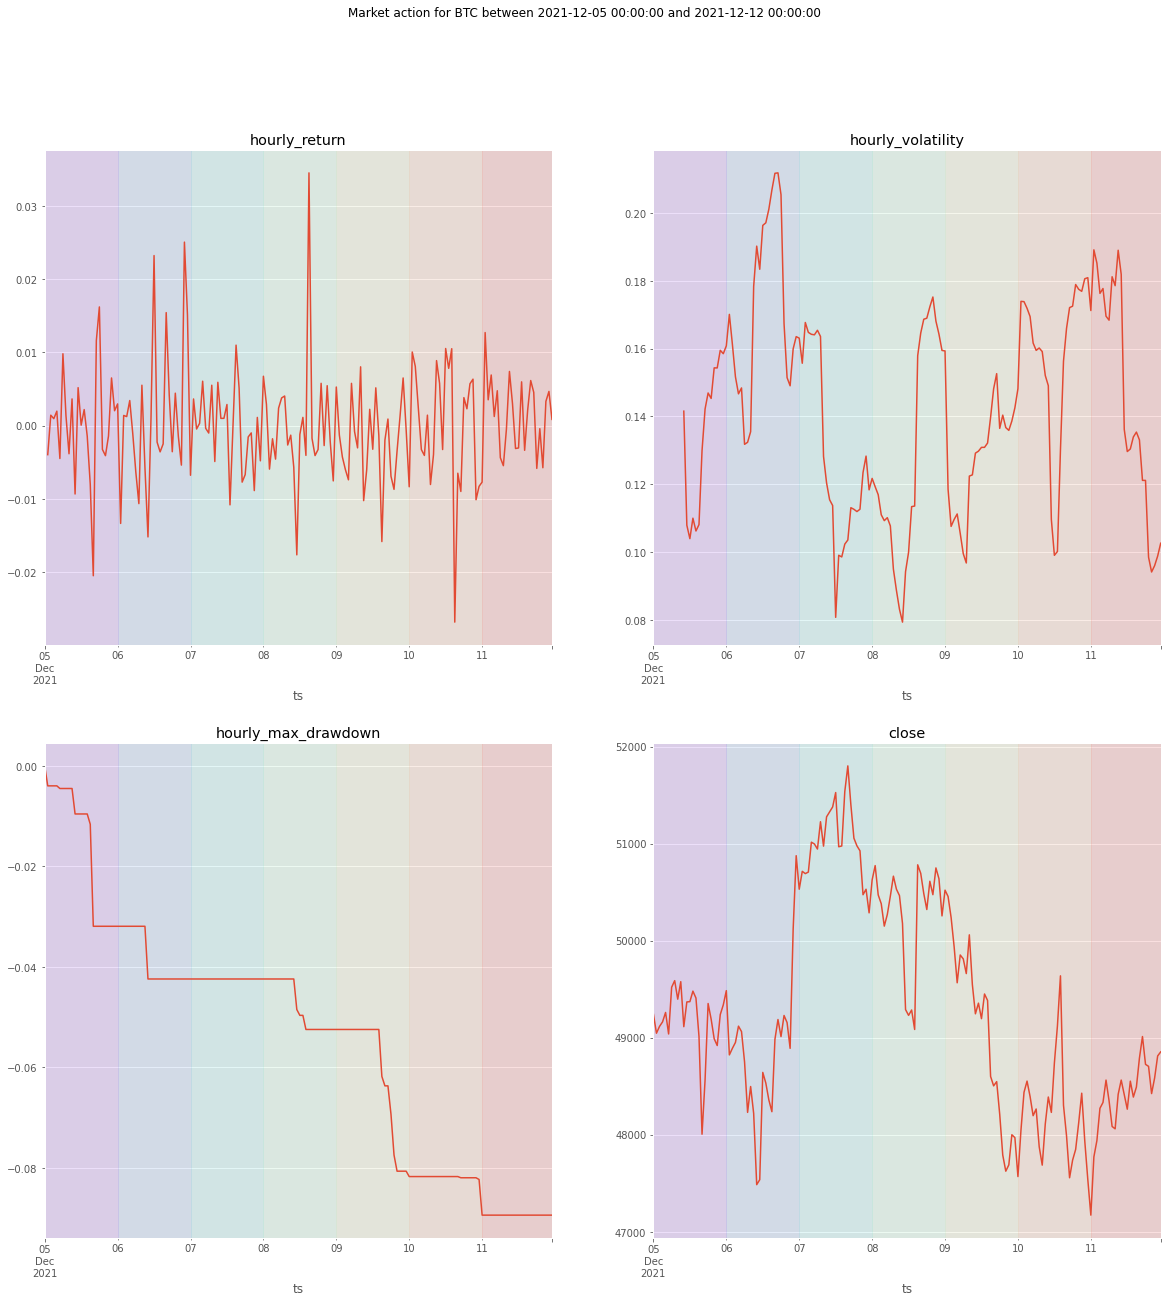

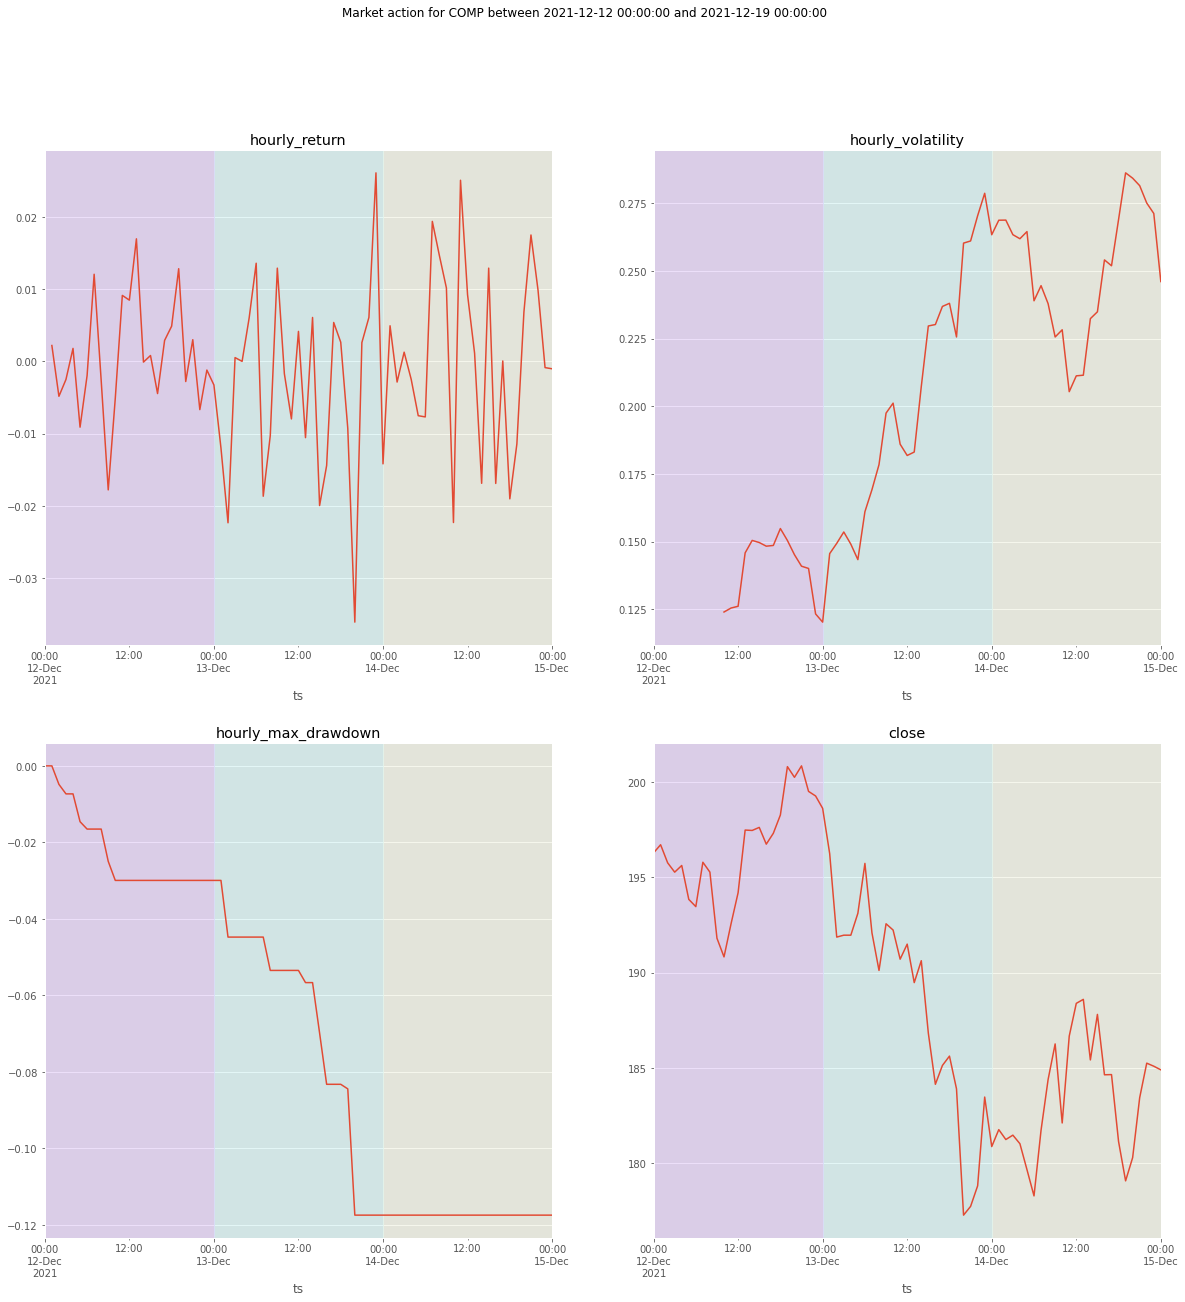

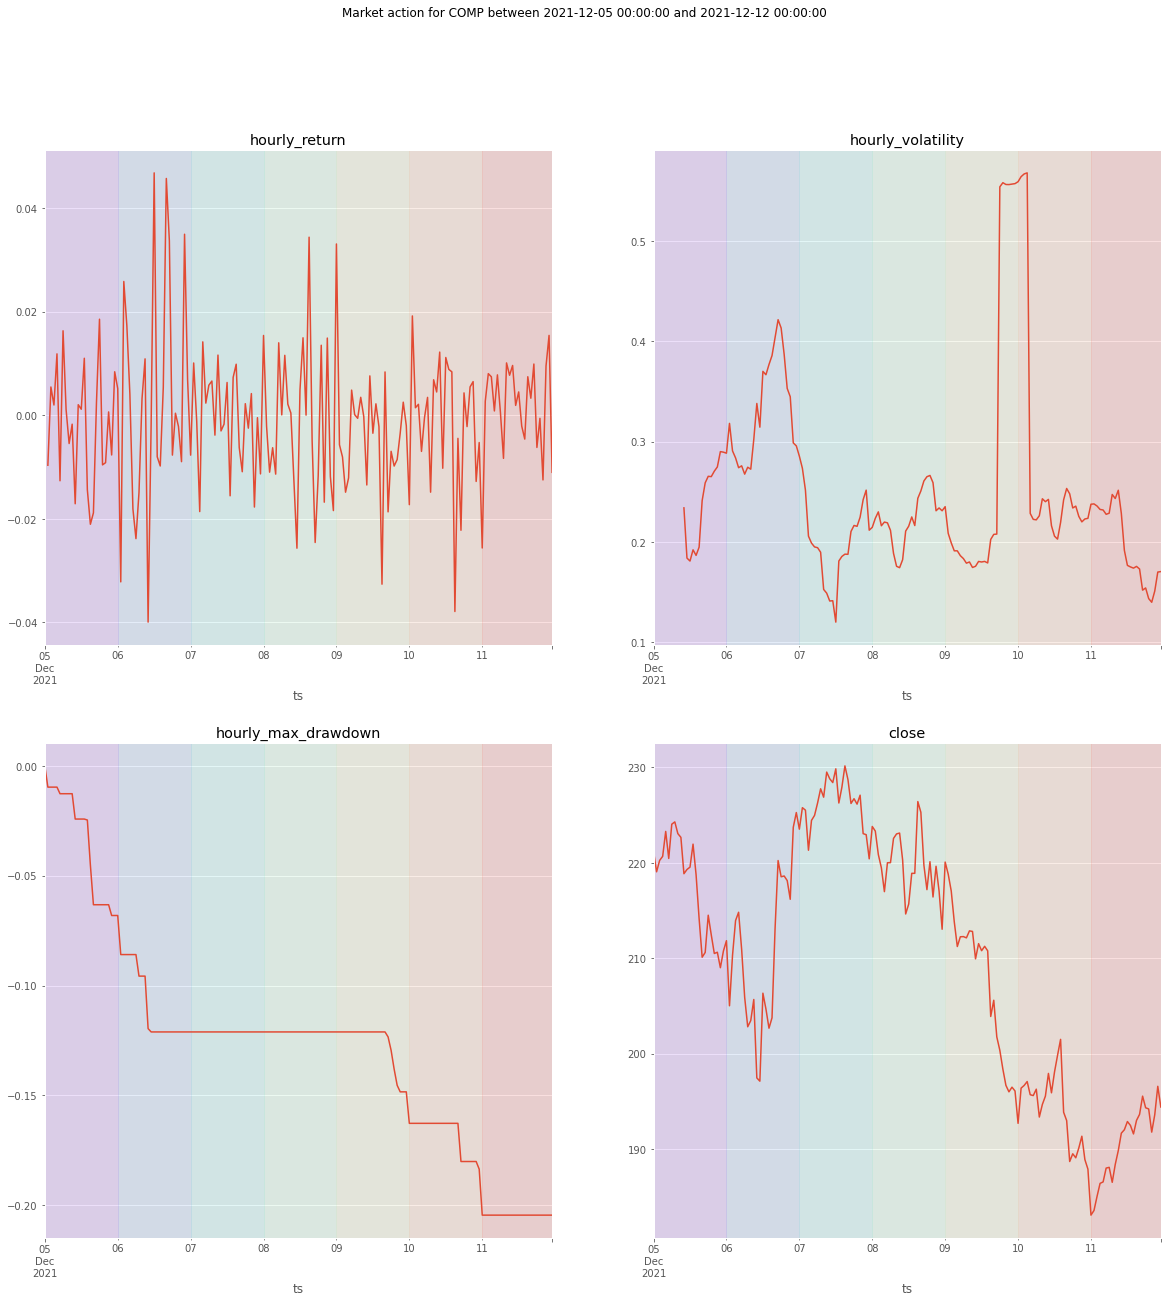

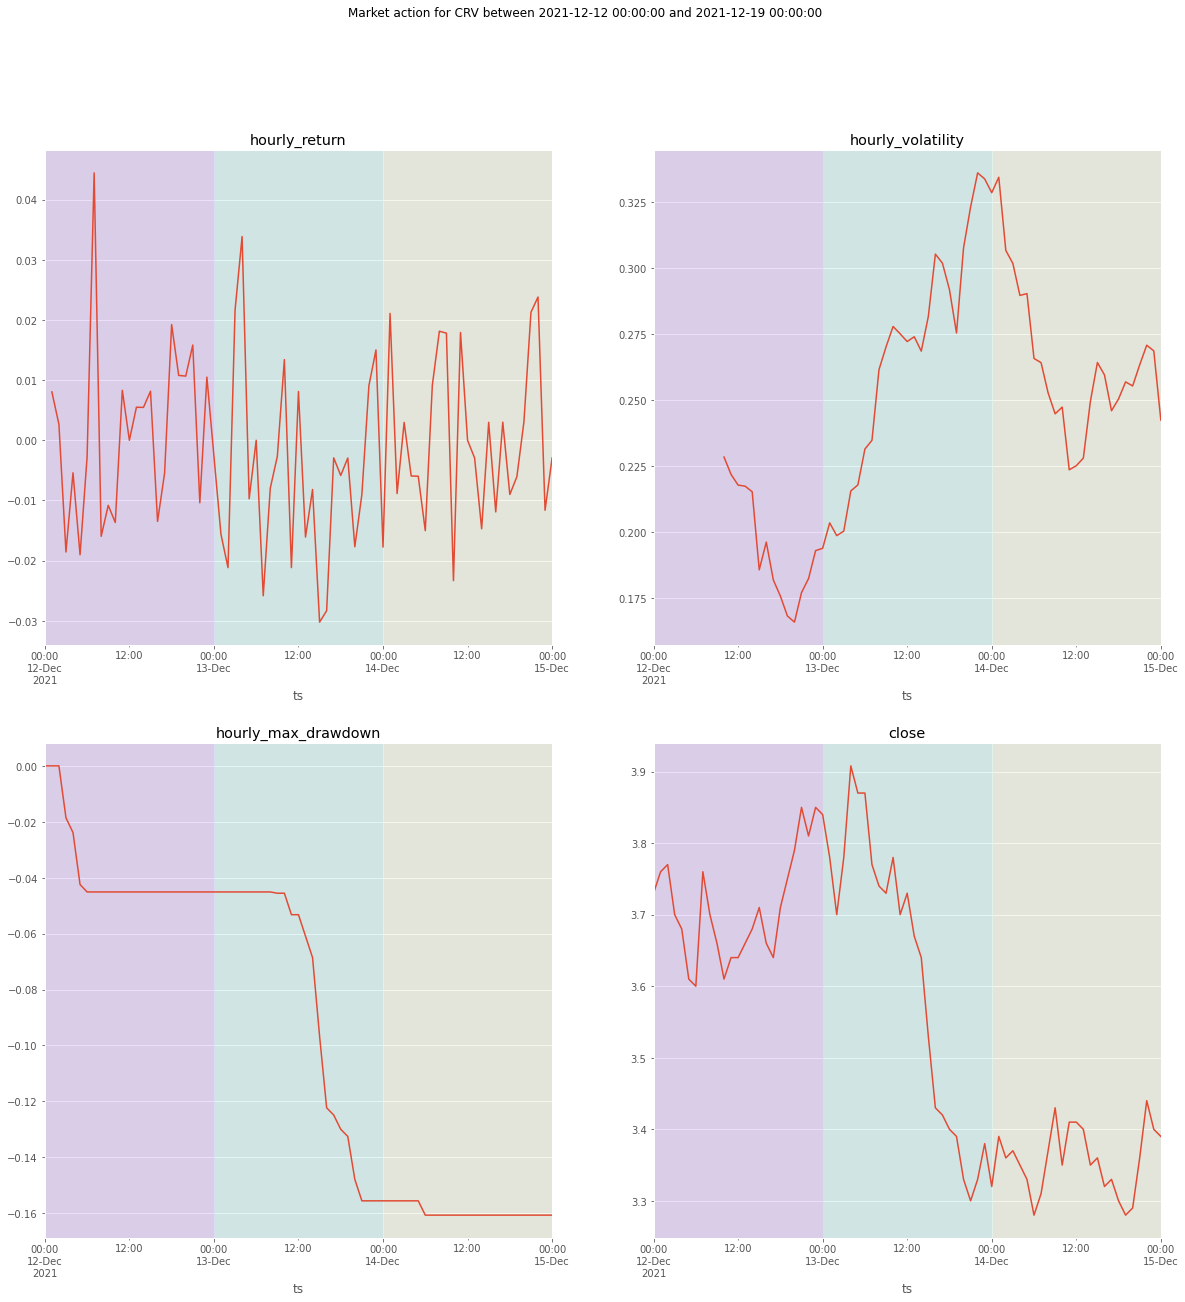

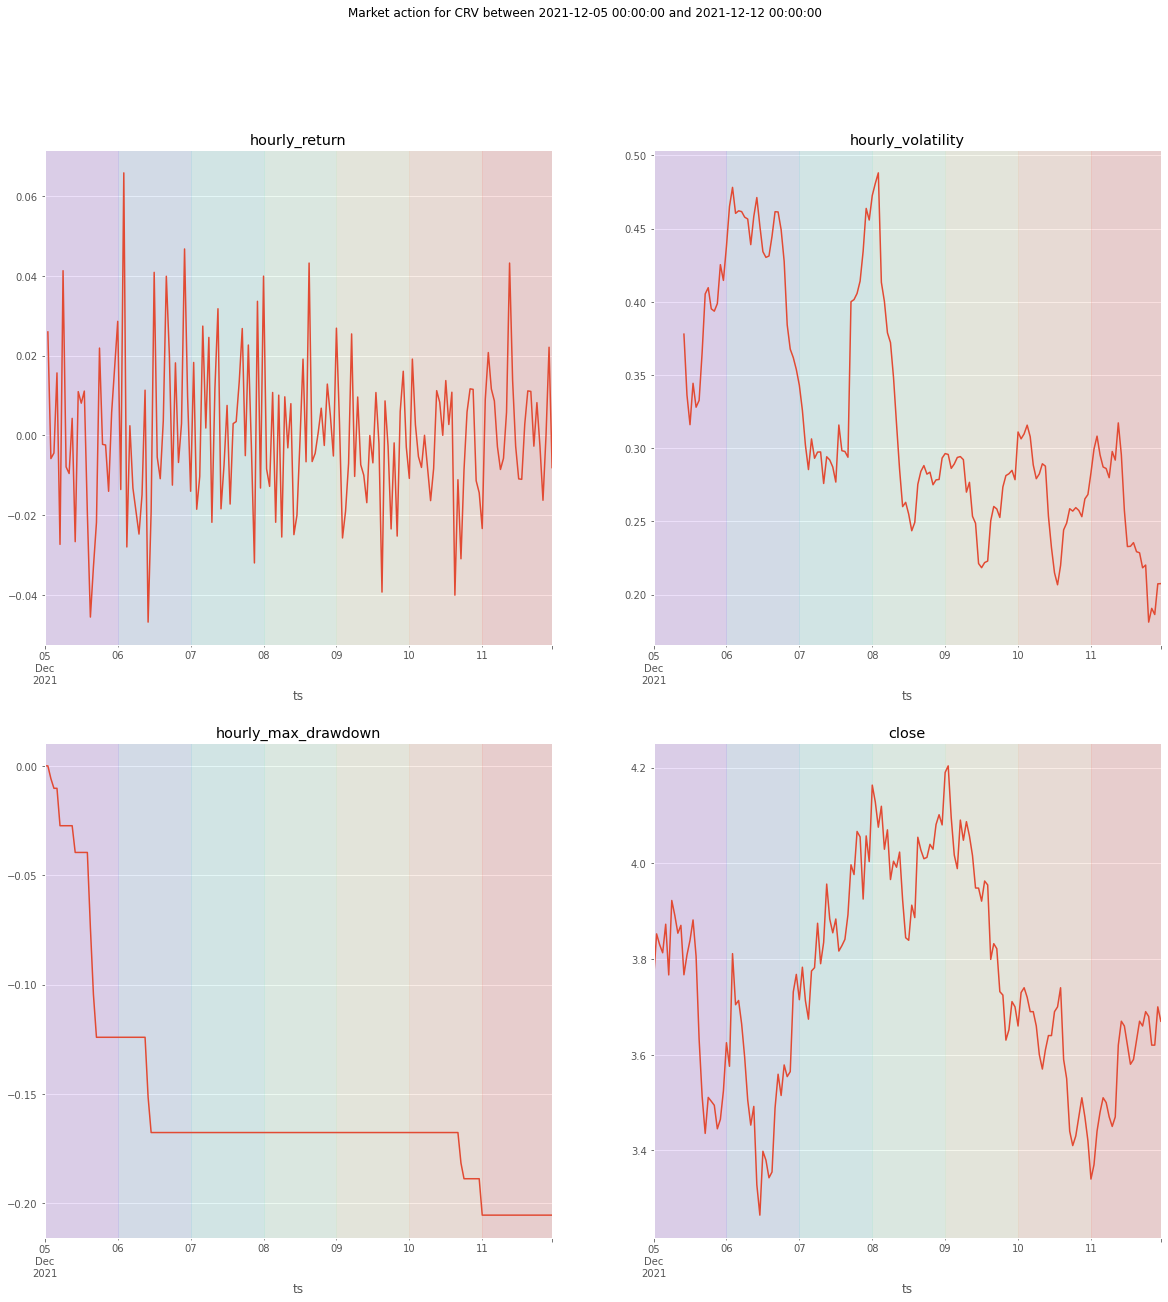

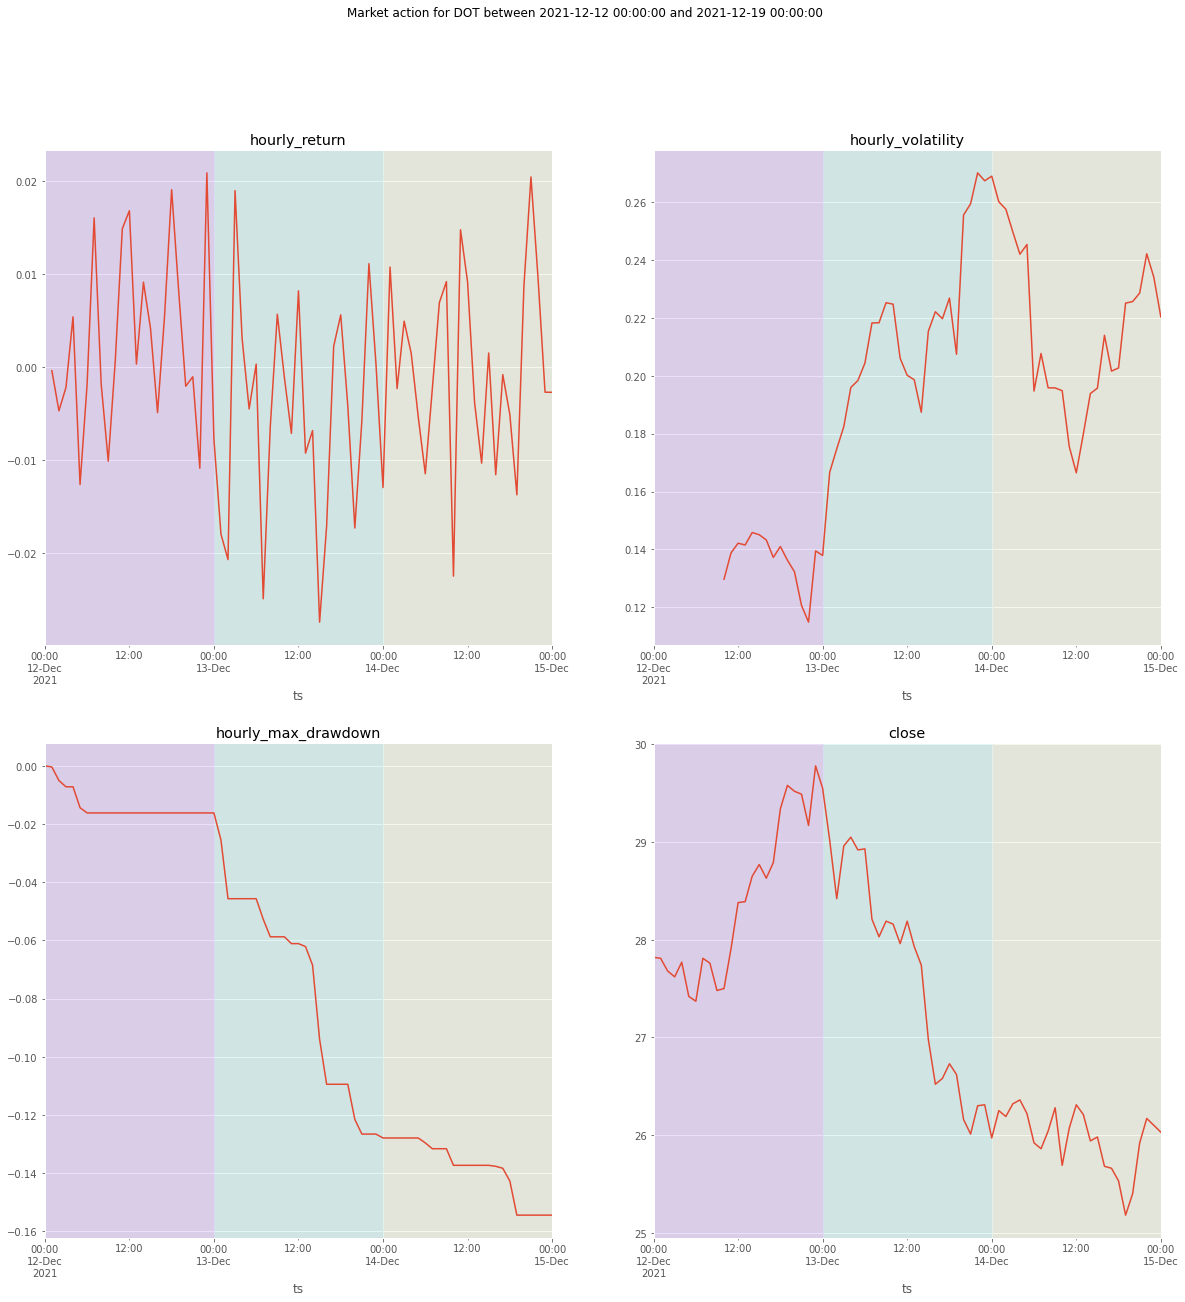

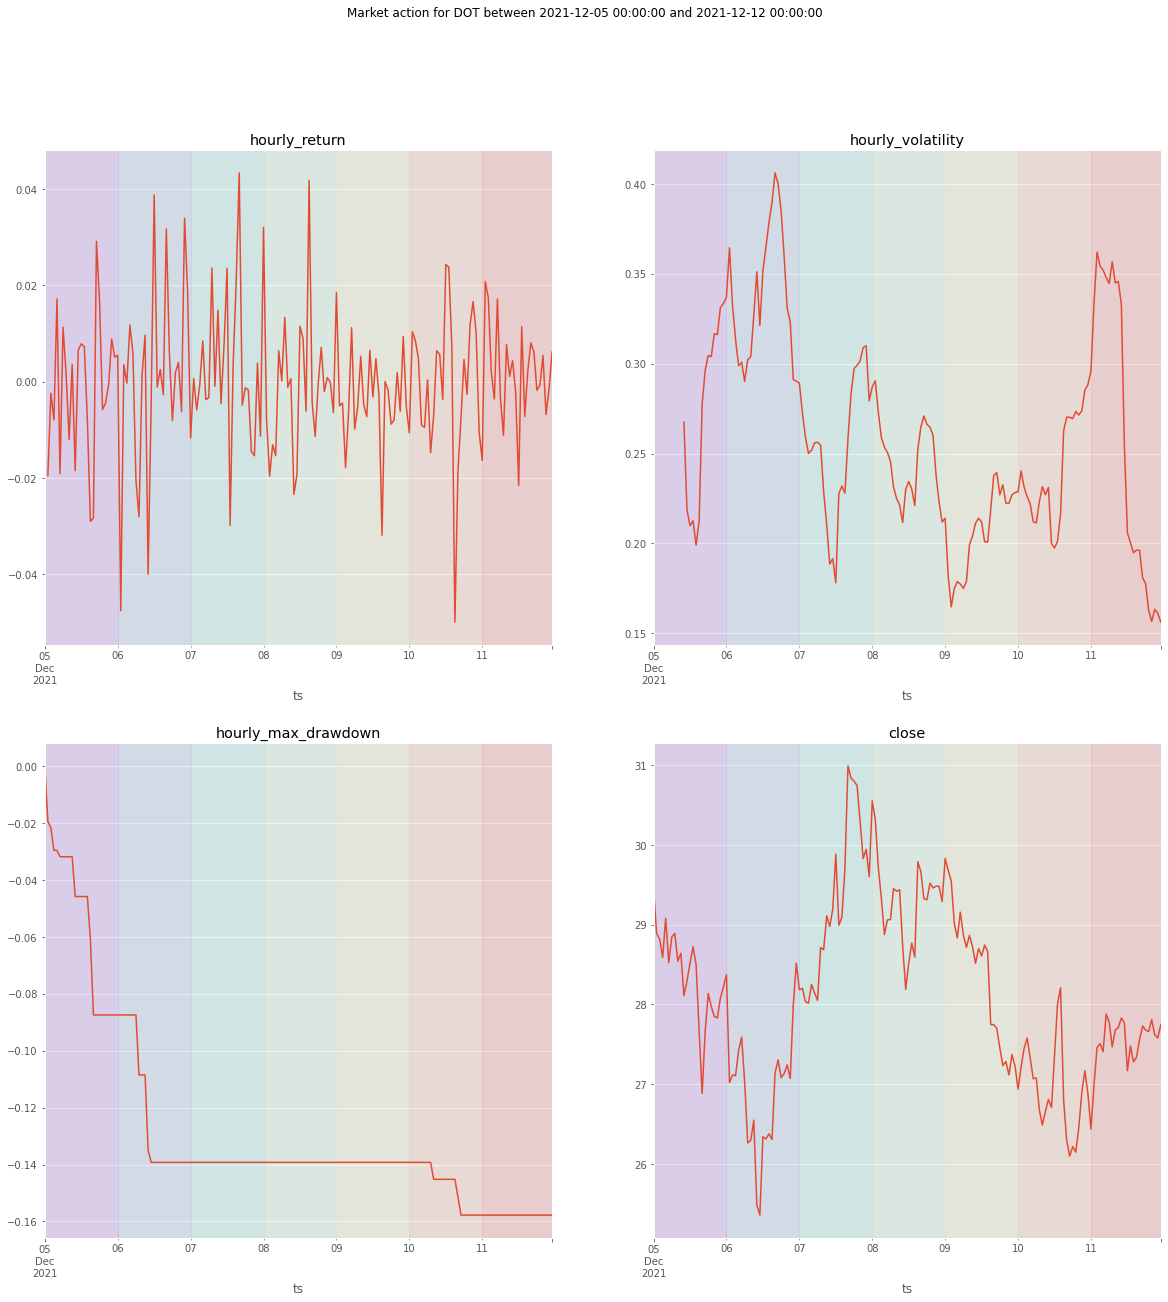

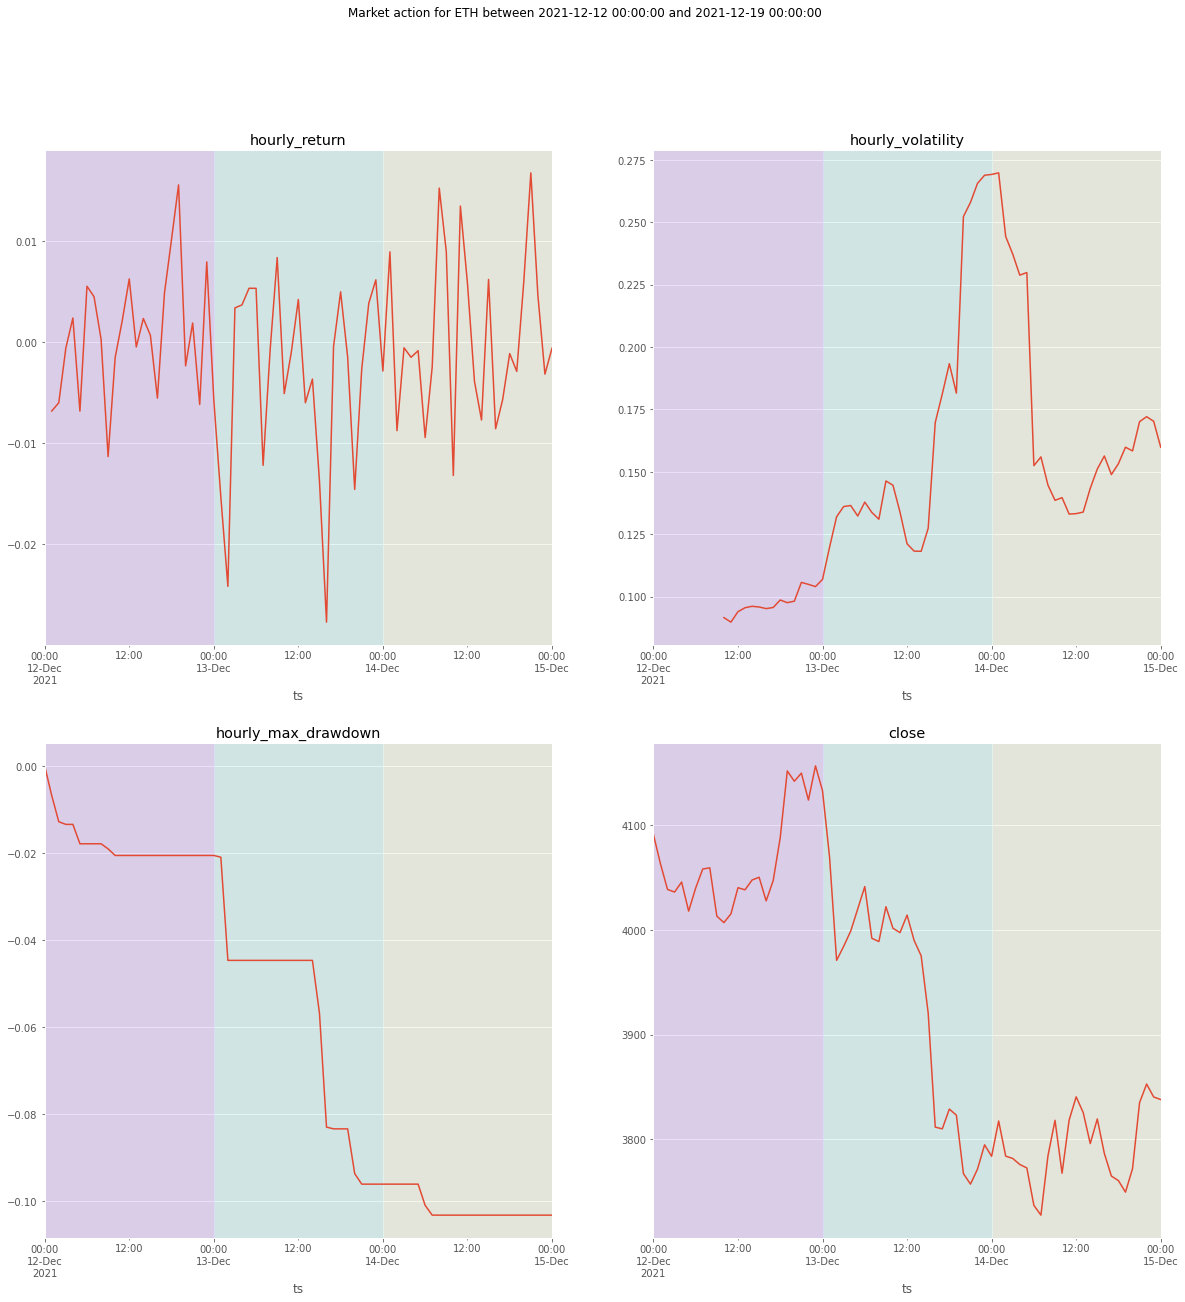

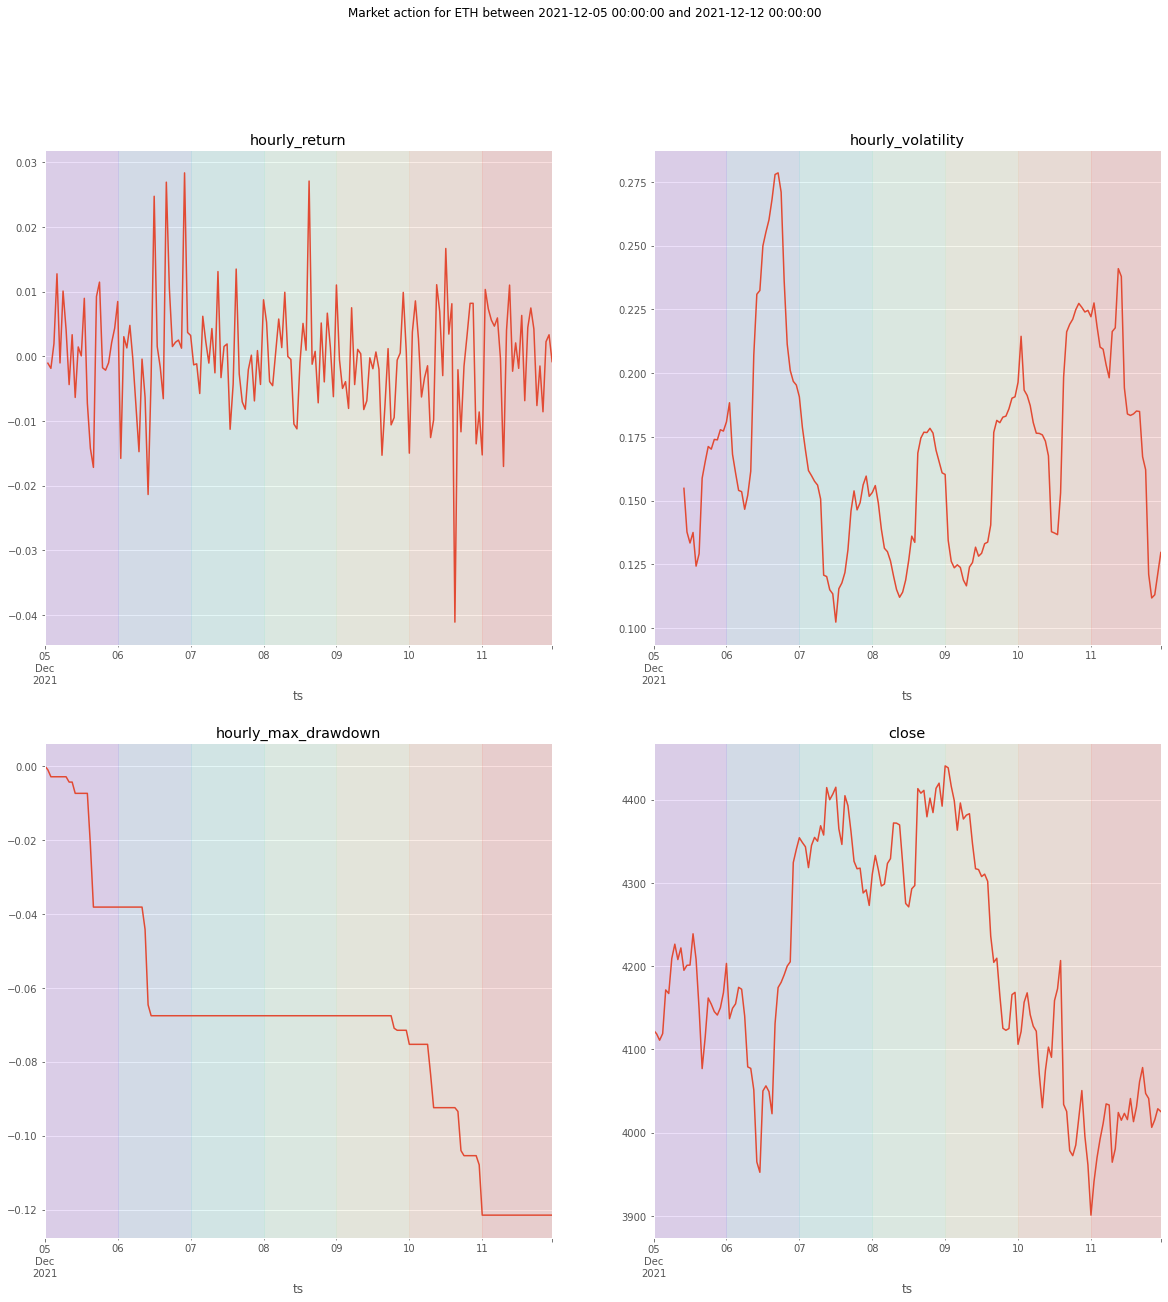

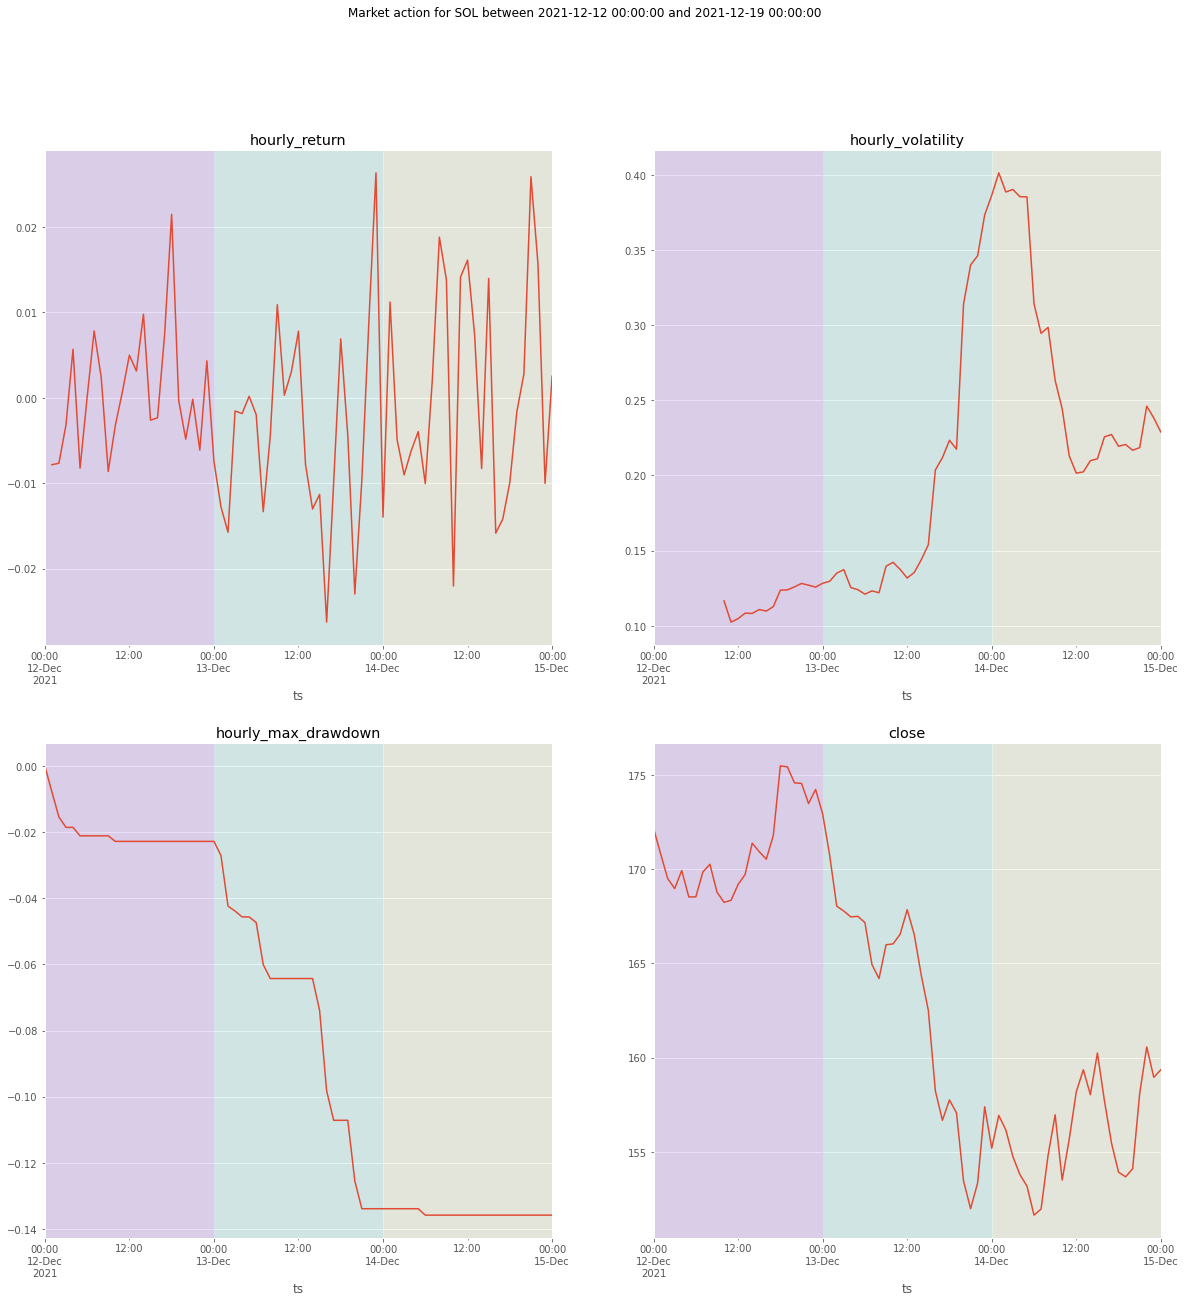

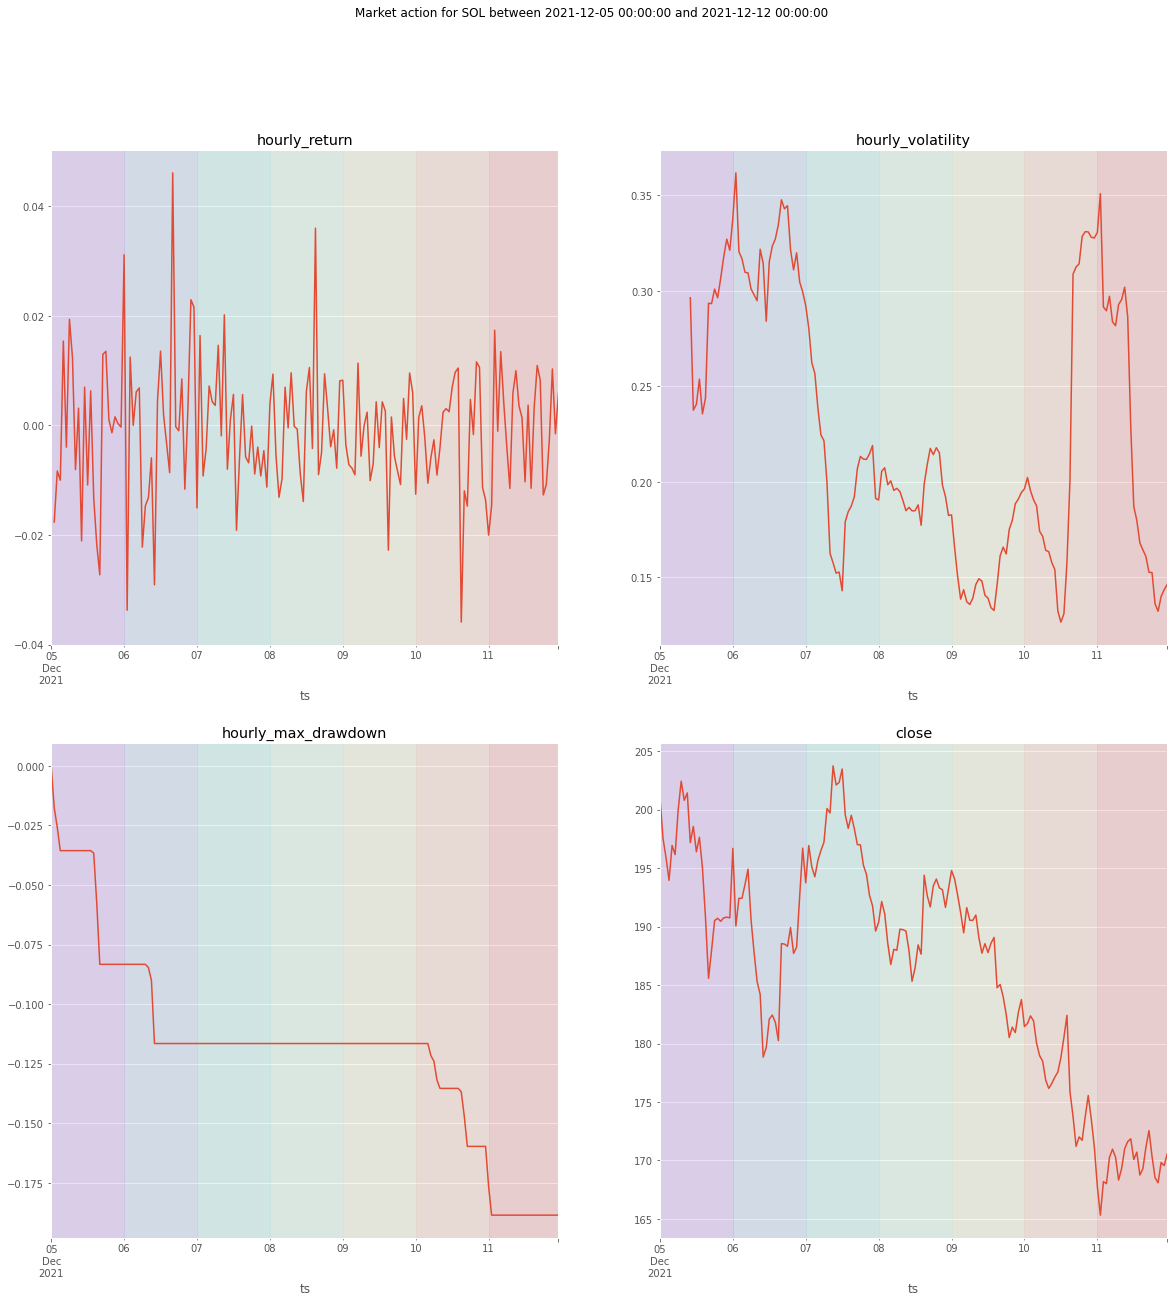

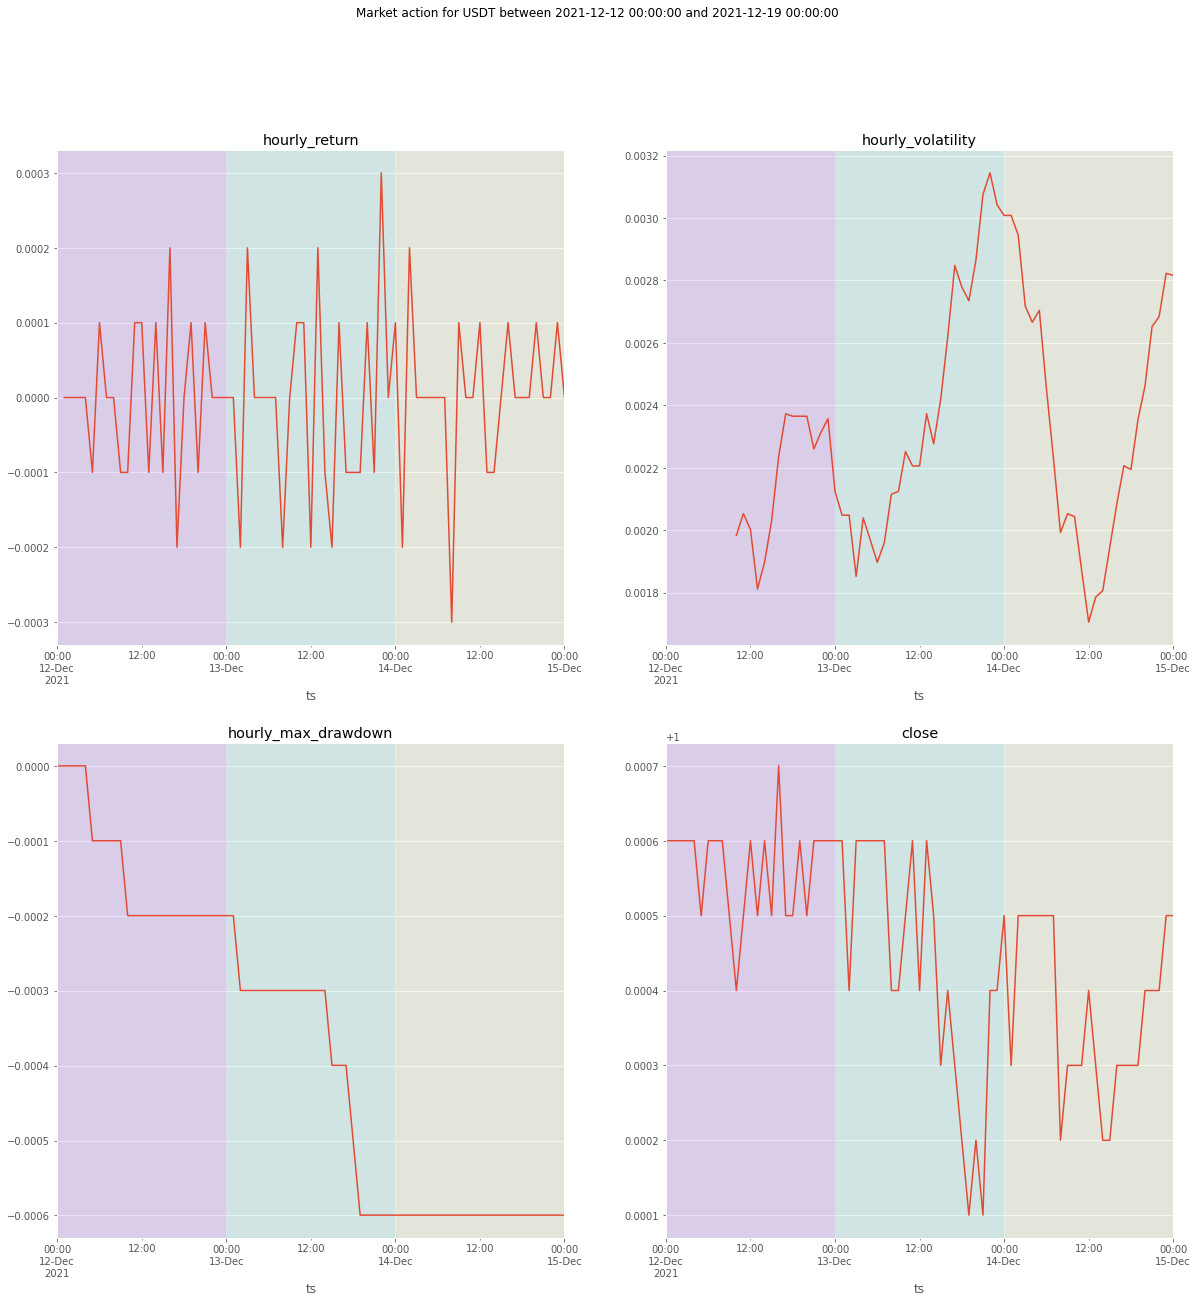

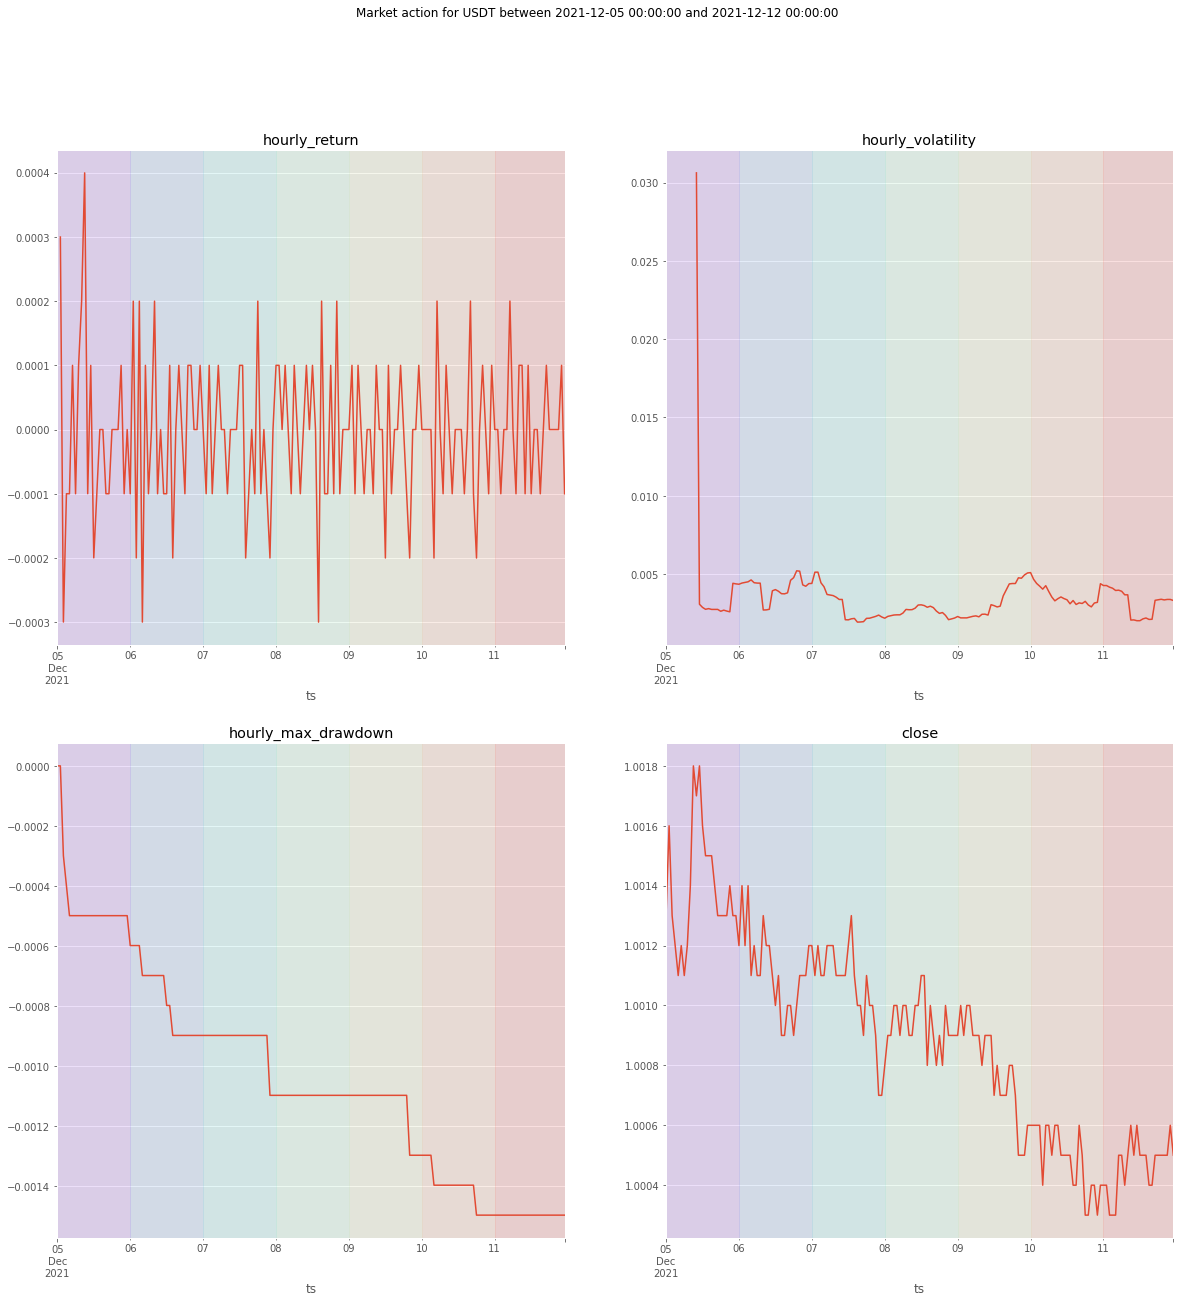

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]